<a href="https://colab.research.google.com/github/AlyAbdulloh/PCVK_SEMESTER-5/blob/main/Quis2/quis_2_PCVK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Kelompok 1:

1. Achmad Aly Abdulloh/02/2141720039

2. Alfan Marcel Mulyawan/08/2141720266

3. Muhammad Rifat Anwar/22/2141720006

In [372]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [373]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from google.colab.patches import cv2_imshow
import os

In [376]:
def load_image(image_path_mtcnn):
    return cv2.imread(image_path_mtcnn)

def preprocces_image(image):
  # mengubah image menjadi grayscale
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

  # menggunakan GaussianBlur untuk mengurangi noise
  blur = cv2.GaussianBlur(gray, (5,5), 0)
  blur = cv2.GaussianBlur(blur, (5,5), 0)
  blur = cv2.GaussianBlur(blur, (5,5), 0)
  blur = cv2.GaussianBlur(blur, (5,5), 0)

  # Tresholding
  th, threshed = cv2.threshold(blur, 0, 255, cv2.THRESH_OTSU + cv2.THRESH_BINARY)

  # Opening
  closing_image = cv2.morphologyEx(threshed, cv2.MORPH_CLOSE, (5,5))
  dilate = cv2.dilate(closing_image, (5,5))

  return dilate

def segmentasi(image):
  #reshape array ke bentuk 2D
  pixel_values = image.reshape((-1, 3))
  # convert to float
  pixel_values = np.float32(pixel_values)

  criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

  k = 2
  _, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
  #konversi titik centroid kedalam integer
  centers = np.uint8(centers)
  #flattening label array
  labels = labels.flatten()
  #konversi warna pixel asli kewarna dari tiap centroidnya
  segmented_image = centers[labels.flatten()]
  # reshape ke bentuk image asli
  segmented_image = segmented_image.reshape(image.shape)

  return segmented_image

def detect_face(image):
  marked = image.copy()
  face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
  roi = face_cascade.detectMultiScale(marked, scaleFactor=1.2, minNeighbors=9, minSize=(30, 30))

  for (x, y, w, h) in roi:
        cv2.rectangle(marked, (x, y), (x+w, y+h), (255, 255, 255), 4)

  return marked

def crop_image(image, face):
  face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
  roi = face_cascade.detectMultiScale(face, scaleFactor=1.2, minNeighbors=9, minSize=(30, 30))
  for i, (x, y, w, h) in enumerate(roi, 1):
        croped_image = image[y:y+h, x:x+w]

  return croped_image

def display(image, preprocessing, segmentation, detect, crop):

  plt.figure(figsize=(12, 4))

    # Gambar Asli
  plt.subplot(1, 5, 1)
  plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
  plt.title('Original Image')
  plt.axis('off')

# preprocessing
  plt.subplot(1, 5, 2)
  plt.imshow(cv2.cvtColor(preprocessing, cv2.COLOR_BGR2RGB))
  plt.title('Preprocessing')
  plt.axis('off')

# Hasil Segmentasi
  plt.subplot(1, 5, 3)
  plt.imshow(cv2.cvtColor(segmentation, cv2.COLOR_BGR2RGB))
  plt.title('Segmentation')
  plt.axis('off')

    # Gambar dengan Wajah Ditandai
  plt.subplot(1, 5, 4)
  plt.imshow(cv2.cvtColor(detect, cv2.COLOR_BGR2RGB))
  plt.title('Image with Faces Marked')
  plt.axis('off')

    # Gambar Wajah yang Dipotong
  plt.subplot(1, 5, 5)
  plt.imshow(cv2.cvtColor(crop, cv2.COLOR_BGR2RGB))
  plt.title('Hasil Crop')
  plt.axis('off')

    # Show the plot
  plt.show()

def process_image(image_path_mtcnn):
    # Load Gambar
    image = load_image(image_path_mtcnn)

    # Preprocess Image
    processed_image = preprocces_image(image)

    segment = segmentasi(processed_image)

    # Detect Faces
    faces = detect_face(segment)

    # Display Results
    crop = crop_image(image, faces)

    display(image, processed_image, segment, faces, crop)


# result_preprocces = preprocces_image(ktp1)

# lokalisasi = lokalisasi(result_preprocces)

# segmentasi = segmentasi(result_preprocces)

# detect = detect_face(segmentasi)

# crop = crop_image(ktp1, detect)

# cv2_imshow(detect)


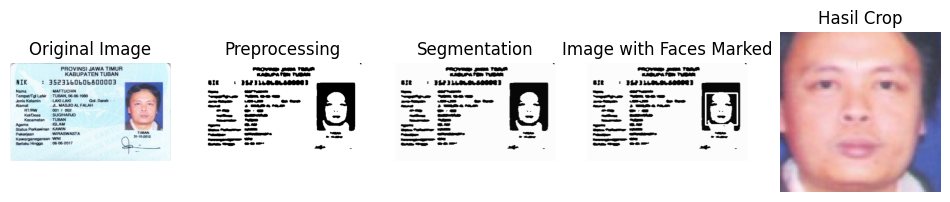

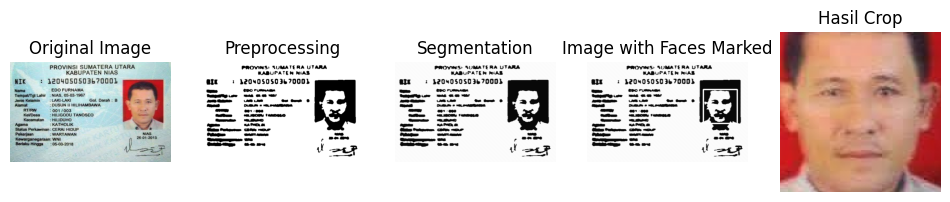

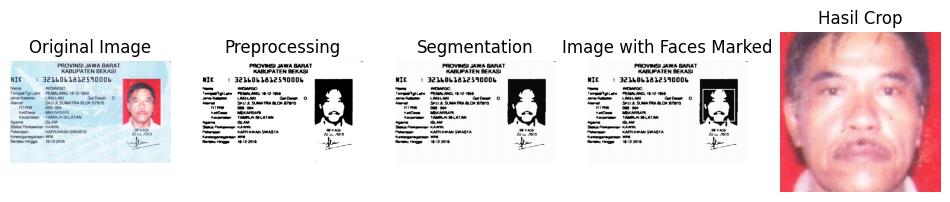

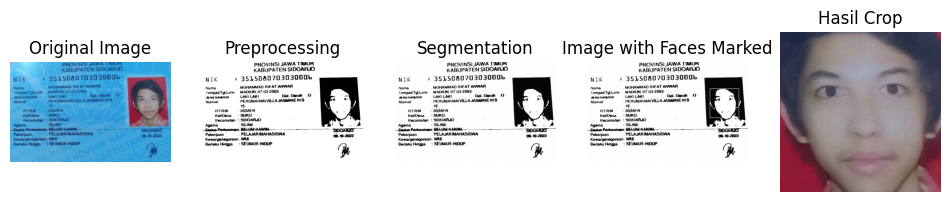

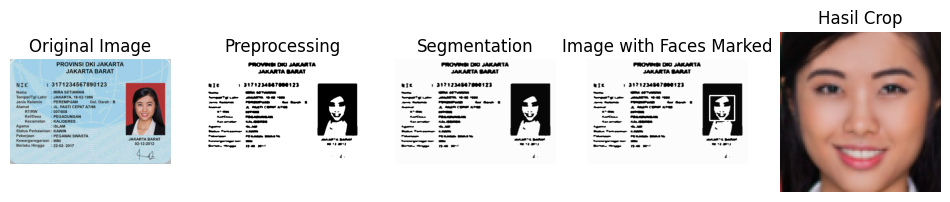

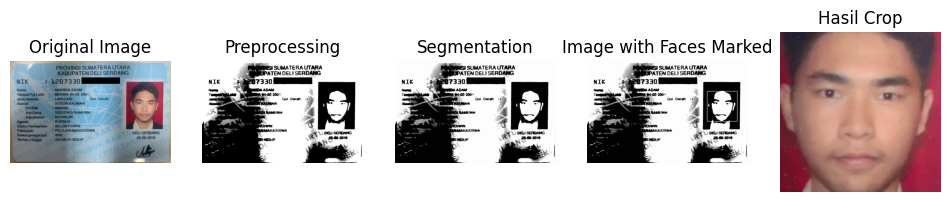

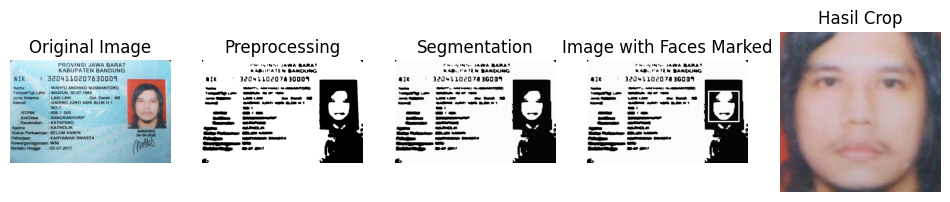

In [377]:
# Menentukan jalur folder
folder_path = '/content/drive/MyDrive/PCVK/DatasetKTP'

# Perulangan semua file dalam folder
for filename in os.listdir(folder_path):
    if filename.endswith('.png') or filename.endswith('.jpg'):
        # Bangun jalur lengkap ke gambar
        image_path = os.path.join(folder_path, filename)

        # Memproses dan menampilkan gambar
        process_image(image_path)

# process_image('/content/drive/MyDrive/PCVK/DatasetKTP/ktp10.jpg')

# path=['/content/drive/MyDrive/PCVK/DatasetKTP']